<a href="https://colab.research.google.com/github/alifele/Brain_Computer_Interface-Competition-/blob/master/What_can_you_do_with_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt

# Predicting the future values of a time series



In [0]:
def time_series_gen(batch_size, time_steps, pred_length):
  '''
  this function will generate new time series (univariante), along with the values
  that will be used to train the model. in fact you will get batch_size number time series.
  That each one has time_step samples.

  the last Argument will be used to generate the Y labels, that is the values that you
  want to predict later.

  for example if you want to predict 10 values, you should set it ot be 10.
  in this case y will have 10 samples for each time series


  '''
  series = []
  y = []
  t = np.linspace(0,10, time_steps+pred_length)
  
  for i in range(batch_size):
    f = 1*np.random.rand()
    phi = 3*np.random.randn()
    data = np.sin(f*t + phi) + 0.3*np.random.randn(t.shape[0])
    series.append(np.expand_dims(data[:time_steps], axis=1))
    y.append(data[time_steps:])

  return np.array(series), np.array(y)



In [0]:
X, y = time_series_gen( 10000, 100, 70)

In [0]:
from sklearn.model_selection import train_test_split 

In [0]:
x_train, x_test, y_train, y_test = train_test_split(X,y)

the orange lines shows the valuse that are going to be predicted


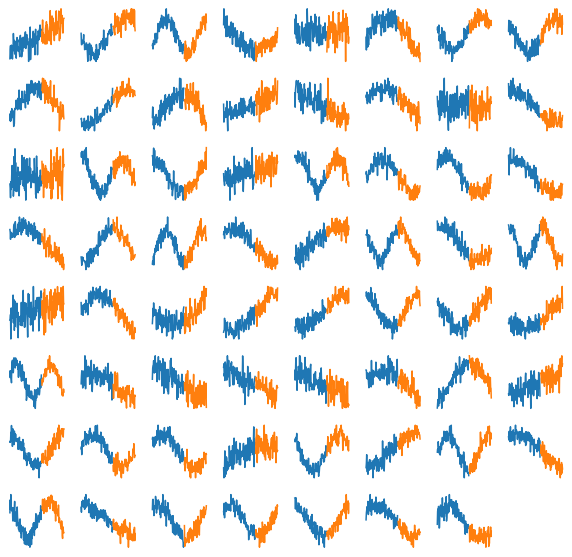

In [55]:
fig = plt.figure(figsize=(10,10))

for i in range(63):
  ax = fig.add_subplot(8,8,i+1)
  ax.plot(x_train[i][:,0])
  ax.plot([len(x_train[i])+ i for i in range(1, len(y_train[i])+1)],y_train[i])
  ax.axis('off')
print('the orange lines shows the valuse that are going to be predicted')

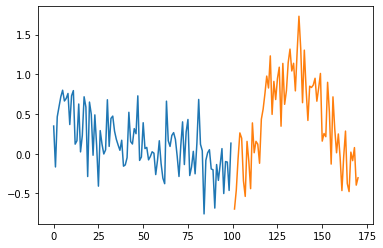

In [56]:
case =12
plt.plot(x_train[case])
plt.plot([len(x_train[case]) + i for i in range(1, len(y_test[case])+1)],y_test[case].tolist())

In [0]:
import tensorflow as tf
from tensorflow import keras

In [0]:
model = keras.models.Sequential()
model.add(keras.layers.SimpleRNN(20, return_sequences=True,input_shape = [None, 1]))
model.add(keras.layers.SimpleRNN(20))
model.add(keras.layers.Dense(len(y_train[0])))

In [0]:
model.compile(loss = 'MSE', optimizer= 'adam')


In [68]:
model.fit(x_train, y_train, epochs=12)

Epoch 1/12
235/235 [==============================] - 7s 30ms/step - loss: 0.3996
Epoch 2/12
235/235 [==============================] - 7s 30ms/step - loss: 0.3951
Epoch 3/12
235/235 [==============================] - 7s 30ms/step - loss: 0.3259
Epoch 4/12
235/235 [==============================] - 7s 30ms/step - loss: 0.3376
Epoch 5/12
235/235 [==============================] - 7s 31ms/step - loss: 0.3339
Epoch 6/12
235/235 [==============================] - 7s 30ms/step - loss: 0.3302
Epoch 7/12
235/235 [==============================] - 7s 30ms/step - loss: 0.3839
Epoch 8/12
235/235 [==============================] - 7s 30ms/step - loss: 0.3298
Epoch 9/12
235/235 [==============================] - 7s 30ms/step - loss: 0.3215
Epoch 10/12
235/235 [==============================] - 7s 31ms/step - loss: 0.2901
Epoch 11/12
235/235 [==============================] - 7s 31ms/step - loss: 0.2758
Epoch 12/12
235/235 [==============================] - 7s 30ms/step - loss: 0.3119


In [0]:
pred = model.predict(x_test)

The orange lines are the actual values and the red ones are predicted values


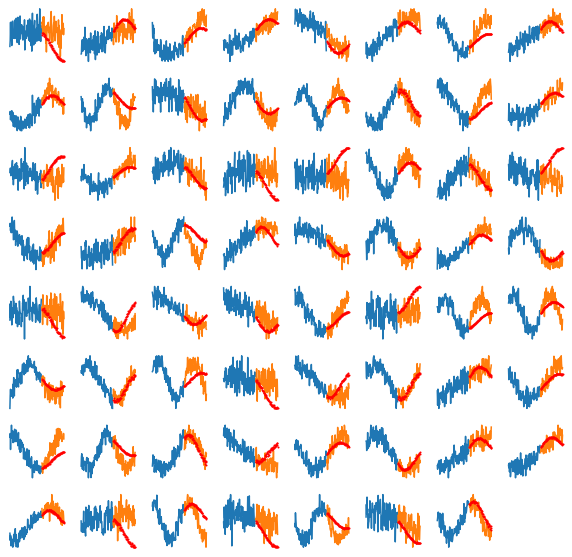

In [71]:
fig = plt.figure(figsize=(10,10))

for i in range(63):
  ax = fig.add_subplot(8,8,i+1)
  ax.plot(x_test[i][:,0])
  ax.plot([len(x_test[i])+ i for i in range(1, len(y_test[i])+1)],y_test[i])
  ax.plot([len(x_test[i])+ i for i in range(1, len(pred[i])+1)],pred[i], 'ro', ms=1)
  ax.axis('off')
print('The orange lines are the actual values and the red ones are predicted values')

# Another Way to train the model

In [0]:
X, y = time_series_gen( 10000, 100, 70)
y = np.expand_dims(y, axis = 2)

In [82]:
X.shape, y.shape

((10000, 100, 1), (10000, 70, 1))

In [0]:
result = np.concatenate((X,y), axis= 1)

In [84]:
result.shape

(10000, 170, 1)

In [87]:
Y = np.empty((10000, 100, 70))
Y.shape[1]

100

In [0]:
for i in range(Y.shape[2]):
  Y[:,:,i] = result[:,i+1:i+1+100,0]

In [91]:
Y.shape, X.shape

((10000, 100, 70), (10000, 100, 1))

In [0]:
x_train, x_test, y_train, y_test = train_test_split(X,Y)

In [0]:
model = keras.models.Sequential()

model.add(keras.layers.SimpleRNN(20, input_shape = [None, 1], return_sequences=True))
model.add(keras.layers.SimpleRNN(20, return_sequences=True))
model.add(keras.layers.TimeDistributed(keras.layers.Dense(70)))

In [0]:
def my_metric(y_true, y_pred):
  return keras.metrics.mean_squared_error(y_true[:,-1], y_pred[:,-1])

In [0]:
model.compile(loss='MSE', optimizer='adam', metrics=[my_metric])

In [105]:
model.fit(x_train, y_train, epochs=20)

Epoch 1/20
235/235 [==============================] - 8s 33ms/step - loss: 0.3658 - my_metric: 0.3366
Epoch 2/20
235/235 [==============================] - 8s 34ms/step - loss: 0.3267 - my_metric: 0.2825
Epoch 3/20
235/235 [==============================] - 8s 34ms/step - loss: 0.3124 - my_metric: 0.2591
Epoch 4/20
235/235 [==============================] - 8s 34ms/step - loss: 0.3017 - my_metric: 0.2409
Epoch 5/20
235/235 [==============================] - 8s 34ms/step - loss: 0.2970 - my_metric: 0.2374
Epoch 6/20
235/235 [==============================] - 8s 34ms/step - loss: 0.2829 - my_metric: 0.2170
Epoch 7/20
235/235 [==============================] - 8s 34ms/step - loss: 0.2749 - my_metric: 0.2040
Epoch 8/20
235/235 [==============================] - 8s 34ms/step - loss: 0.2723 - my_metric: 0.2038
Epoch 9/20
235/235 [==============================] - 8s 34ms/step - loss: 0.2614 - my_metric: 0.1908
Epoch 10/20
235/235 [==============================] - 8s 33ms/step - loss: 0.2575

In [116]:
pred = model.predict(x_test)
pred.shape

(2500, 100, 70)

In [107]:
x_train.shape, y_train.shape

((7500, 100, 1), (7500, 100, 70))

(-8.450000000000001, 177.45, -1.6081146690799237, 0.9133399686645202)

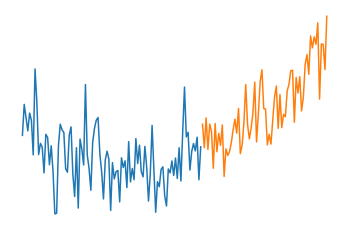

In [111]:
case=  15
plt.plot(x_train[case][:,0])
plt.plot([len(x_train[case,:,0]) + i for i in range(y_train.shape[-1])], y_train[case][-1,:])
plt.axis('off')

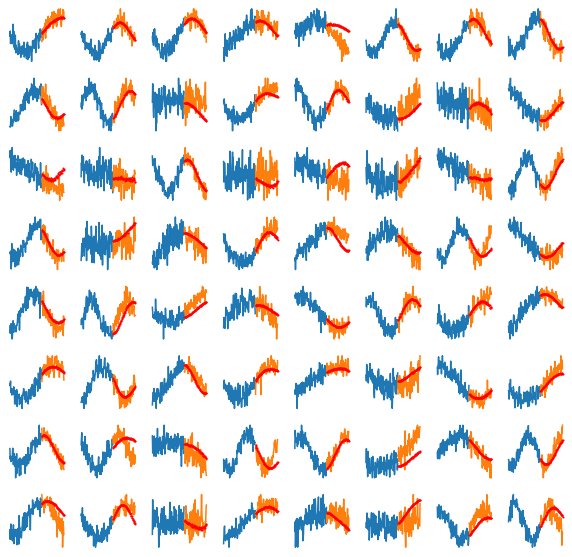

In [119]:
fig = plt.figure(figsize=(10,10))
#case = 12
for i in range(64):
  ax = fig.add_subplot(8,8,i+1)
  ax.plot(x_test[i][:,0])
  ax.plot([len(x_test[i,:,0]) + i for i in range(y_test.shape[-1])], y_test[i][-1,:])
  ax.plot([len(x_test[i,:,0]) + i for i in range(y_test.shape[-1])], pred[i][-1,:], 'ro', ms=1)
  ax.axis('off')

# Time Series Classification With RNN

Lets generate some new time series with different *integer* frequencies. let's challenge our RNN to see that whether it can classify the sequences or not

In [0]:
def Generate_timeseries(batch_size, time_steps, classes):
  data = []
  label = []
  t = np.linspace(0,2, time_steps)
  for i in range(batch_size):
    f = np.random.randint(classes)+1
    sin = np.sin(2*np.pi*f*t + np.random.randn()) + 0.2*np.random.randn(t.shape[0])
    sin = np.expand_dims(sin, axis=1)
    data.append(sin)
    label.append(f)
  
  return np.array(data), np.array(label)


In [0]:
classes= 3
time_steps = 100
batch_size = 1000
data, label = Generate_timeseries(batch_size, time_steps, classes)


In [209]:
data.shape, label.shape

((1000, 100, 1), (1000,))

(-4.95, 103.95, -1.4776241727893942, 1.5066403501048693)

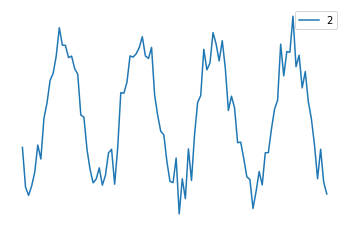

In [210]:
plt.plot(data[21][:,0], label = label[21])
plt.legend()
plt.axis('off')

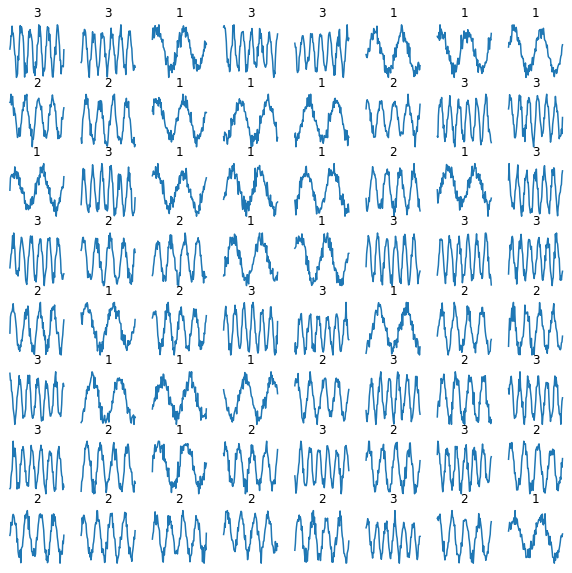

In [211]:
fig = plt.figure(figsize=(10,10))

for i in range(64):
  ax = fig.add_subplot(8,8,i+1, title=label[i])
  ax.plot(data[i][:,0], label = label[i])
  ax.axis('off')


In [300]:
x_train, x_test, y_train, y_test = train_test_split(data, label)
x_train.shape, y_train.shape

((750, 100, 1), (750,))

In [0]:
model = keras.models.Sequential()

model.add(keras.layers.SimpleRNN(10,return_sequences=True, input_shape=[None, 1]))
model.add(keras.layers.SimpleRNN(10))

model.add(keras.layers.Dense(12, activation = 'relu'))
model.add(keras.layers.Dense(classes, activation = 'softmax'))


In [303]:
model.summary()

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_31 (SimpleRNN)    (None, None, 10)          120       
_________________________________________________________________
simple_rnn_32 (SimpleRNN)    (None, 10)                210       
_________________________________________________________________
dense_44 (Dense)             (None, 12)                132       
_________________________________________________________________
dense_45 (Dense)             (None, 3)                 39        
Total params: 501
Trainable params: 501
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss='sparse_categorical_crossentropy',
              metrics = ['accuracy'],
              optimizer = 'adam')

In [305]:
model.fit(x_train, y_train-1, epochs=20)

Epoch 1/20
24/24 [==============================] - 1s 28ms/step - loss: 1.1563 - accuracy: 0.3773
Epoch 2/20
24/24 [==============================] - 1s 28ms/step - loss: 1.0699 - accuracy: 0.4187
Epoch 3/20
24/24 [==============================] - 1s 26ms/step - loss: 1.0246 - accuracy: 0.4387
Epoch 4/20
24/24 [==============================] - 1s 27ms/step - loss: 0.9630 - accuracy: 0.5280
Epoch 5/20
24/24 [==============================] - 1s 28ms/step - loss: 0.8019 - accuracy: 0.6853
Epoch 6/20
24/24 [==============================] - 1s 28ms/step - loss: 0.6749 - accuracy: 0.7333
Epoch 7/20
24/24 [==============================] - 1s 25ms/step - loss: 0.6027 - accuracy: 0.7560
Epoch 8/20
24/24 [==============================] - 1s 27ms/step - loss: 0.5427 - accuracy: 0.7667
Epoch 9/20
24/24 [==============================] - 1s 25ms/step - loss: 0.4864 - accuracy: 0.7760
Epoch 10/20
24/24 [==============================] - 1s 26ms/step - loss: 0.4364 - accuracy: 0.8093
Epoch 11/

In [306]:
model.evaluate(x_test, y_test-1)

8/8 [==============================] - 0s 7ms/step - loss: 0.1730 - accuracy: 0.9680


[0.17298436164855957, 0.9679999947547913]

In [0]:
pred = model.predict(x_test) 
pred = np.argmax(pred, axis = 1) + 1

In [318]:
pred

array([1, 2, 3, 2, 1, 1, 3, 2, 1, 3, 3, 2, 3, 1, 2, 2, 2, 3, 1, 1, 1, 3,
       3, 3, 1, 2, 3, 1, 2, 2, 1, 3, 3, 1, 2, 1, 3, 3, 3, 1, 1, 3, 1, 1,
       2, 3, 3, 3, 1, 2, 2, 2, 3, 3, 2, 3, 3, 3, 2, 2, 2, 3, 2, 1, 2, 3,
       2, 1, 3, 2, 1, 3, 3, 1, 1, 2, 1, 1, 3, 2, 3, 3, 1, 1, 1, 1, 3, 1,
       1, 2, 1, 1, 2, 2, 1, 2, 1, 3, 2, 2, 3, 3, 3, 2, 1, 3, 1, 3, 2, 2,
       3, 2, 1, 3, 2, 3, 3, 2, 1, 3, 3, 2, 2, 2, 2, 1, 1, 1, 3, 3, 2, 1,
       2, 2, 2, 3, 3, 2, 2, 3, 2, 1, 3, 3, 1, 2, 3, 2, 2, 1, 3, 3, 1, 1,
       2, 1, 1, 2, 1, 2, 2, 1, 1, 3, 2, 2, 1, 2, 1, 3, 3, 3, 3, 3, 2, 1,
       3, 3, 2, 3, 1, 3, 2, 3, 3, 2, 3, 1, 1, 1, 2, 2, 1, 1, 2, 2, 3, 1,
       1, 3, 2, 1, 3, 3, 1, 1, 1, 1, 2, 3, 1, 2, 3, 1, 2, 1, 1, 2, 3, 1,
       1, 2, 1, 2, 3, 3, 2, 3, 1, 3, 1, 3, 1, 3, 1, 1, 3, 1, 2, 3, 3, 1,
       3, 3, 2, 1, 3, 2, 1, 1])

In [0]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [0]:
mat = confusion_matrix( y_test, pred)

In [320]:
print(mat)

[[81  1  0]
 [ 0 76  2]
 [ 5  0 85]]


In [0]:
report = classification_report(y_test, pred)

In [323]:
print(report)

              precision    recall  f1-score   support

           1       0.94      0.99      0.96        82
           2       0.99      0.97      0.98        78
           3       0.98      0.94      0.96        90

    accuracy                           0.97       250
   macro avg       0.97      0.97      0.97       250
weighted avg       0.97      0.97      0.97       250



# Using LSTM and GRU cells

In [0]:
def Generate_timeseries(batch_size, time_steps, classes):
  data = []
  label = []
  t = np.linspace(0,2, time_steps)
  for i in range(batch_size):
    f = np.random.randint(classes)+1
    sin = np.sin(2*np.pi*f*t + np.random.randn()) + 0.2*np.random.randn(t.shape[0])
    sin = np.expand_dims(sin, axis=1)
    data.append(sin)
    label.append(f)
  
  return np.array(data), np.array(label)


In [0]:
classes= 6
time_steps = 100
batch_size = 1000
data, label = Generate_timeseries(batch_size, time_steps, classes)


In [326]:
data.shape, label.shape

((1000, 100, 1), (1000,))

(-4.95, 103.95, -1.4347236948527833, 1.4362401600213364)

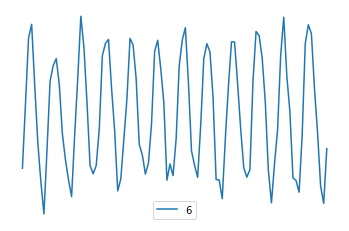

In [327]:
plt.plot(data[21][:,0], label = label[21])
plt.legend()
plt.axis('off')

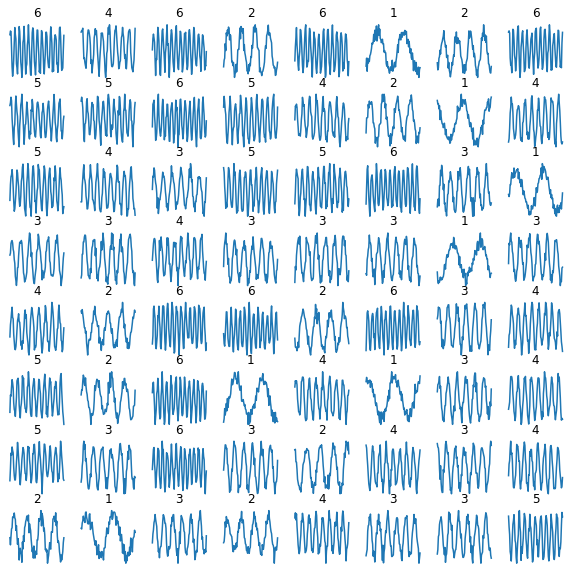

In [328]:
fig = plt.figure(figsize=(10,10))

for i in range(64):
  ax = fig.add_subplot(8,8,i+1, title=label[i])
  ax.plot(data[i][:,0], label = label[i])
  ax.axis('off')


In [329]:
x_train, x_test, y_train, y_test = train_test_split(data, label)
x_train.shape, y_train.shape

((750, 100, 1), (750,))

In [0]:
model = keras.models.Sequential()

model.add(keras.layers.LSTM(10,return_sequences=True, input_shape=[None, 1]))
model.add(keras.layers.LSTM(10))

model.add(keras.layers.Dense(12, activation = 'relu'))
model.add(keras.layers.Dense(classes, activation = 'softmax'))


In [331]:
model.summary()

Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, None, 10)          480       
_________________________________________________________________
lstm_1 (LSTM)                (None, 10)                840       
_________________________________________________________________
dense_46 (Dense)             (None, 12)                132       
_________________________________________________________________
dense_47 (Dense)             (None, 6)                 78        
Total params: 1,530
Trainable params: 1,530
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss='sparse_categorical_crossentropy',
              metrics = ['accuracy'],
              optimizer = 'adam')

In [333]:
model.fit(x_train, y_train-1, epochs=20)

Epoch 1/20
24/24 [==============================] - 1s 62ms/step - loss: 1.7849 - accuracy: 0.1800
Epoch 2/20
24/24 [==============================] - 1s 62ms/step - loss: 1.7551 - accuracy: 0.2773
Epoch 3/20
24/24 [==============================] - 2s 64ms/step - loss: 1.6876 - accuracy: 0.3187
Epoch 4/20
24/24 [==============================] - 2s 65ms/step - loss: 1.5773 - accuracy: 0.4227
Epoch 5/20
24/24 [==============================] - 1s 62ms/step - loss: 1.4725 - accuracy: 0.4733
Epoch 6/20
24/24 [==============================] - 1s 62ms/step - loss: 1.3731 - accuracy: 0.5307
Epoch 7/20
24/24 [==============================] - 2s 64ms/step - loss: 1.2668 - accuracy: 0.5760
Epoch 8/20
24/24 [==============================] - 1s 62ms/step - loss: 1.1774 - accuracy: 0.5800
Epoch 9/20
24/24 [==============================] - 2s 64ms/step - loss: 1.0993 - accuracy: 0.5960
Epoch 10/20
24/24 [==============================] - 2s 64ms/step - loss: 0.9316 - accuracy: 0.6640
Epoch 11/

In [334]:
model.evaluate(x_test, y_test-1)

8/8 [==============================] - 0s 11ms/step - loss: 0.3766 - accuracy: 0.8480


[0.37659063935279846, 0.8479999899864197]

In [0]:
pred = model.predict(x_test) 
pred = np.argmax(pred, axis = 1) + 1

In [336]:
pred

array([3, 6, 1, 4, 2, 1, 6, 3, 6, 1, 4, 3, 6, 3, 2, 2, 6, 4, 6, 6, 2, 4,
       3, 6, 3, 6, 2, 6, 6, 6, 6, 5, 6, 6, 1, 6, 3, 3, 6, 2, 6, 2, 4, 1,
       6, 6, 2, 2, 4, 3, 6, 6, 6, 2, 3, 3, 6, 6, 4, 6, 6, 6, 6, 2, 6, 6,
       3, 4, 6, 2, 3, 3, 3, 2, 1, 6, 6, 4, 3, 3, 6, 4, 1, 4, 5, 1, 6, 2,
       4, 2, 1, 6, 2, 2, 1, 6, 6, 1, 6, 6, 6, 4, 3, 3, 6, 1, 2, 6, 4, 6,
       3, 3, 3, 1, 3, 4, 2, 3, 3, 4, 6, 4, 2, 6, 6, 1, 3, 1, 2, 6, 4, 6,
       6, 3, 2, 4, 6, 6, 4, 6, 3, 2, 6, 6, 1, 4, 3, 6, 1, 6, 1, 4, 2, 6,
       2, 1, 2, 2, 1, 3, 4, 3, 4, 1, 4, 6, 1, 2, 6, 6, 1, 2, 6, 6, 1, 6,
       4, 6, 1, 3, 2, 1, 6, 1, 3, 3, 3, 2, 2, 1, 4, 3, 3, 1, 2, 1, 1, 4,
       4, 4, 2, 3, 3, 1, 2, 4, 3, 1, 6, 1, 2, 6, 6, 6, 4, 6, 1, 2, 1, 6,
       3, 3, 2, 4, 4, 4, 4, 4, 4, 6, 4, 1, 4, 3, 4, 6, 6, 2, 2, 3, 6, 3,
       1, 2, 1, 1, 3, 1, 2, 1])

In [0]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [0]:
mat = confusion_matrix( y_test, pred)

In [339]:
print(mat)

[[40  0  0  0  0  0]
 [ 2 42  0  0  0  0]
 [ 0  0 46  0  0  0]
 [ 0  0  0 37  0  0]
 [ 0  0  0  4  2 32]
 [ 0  0  0  0  0 45]]


In [0]:
report = classification_report(y_test, pred)

In [341]:
print(report)

              precision    recall  f1-score   support

           1       0.95      1.00      0.98        40
           2       1.00      0.95      0.98        44
           3       1.00      1.00      1.00        46
           4       0.90      1.00      0.95        37
           5       1.00      0.05      0.10        38
           6       0.58      1.00      0.74        45

    accuracy                           0.85       250
   macro avg       0.91      0.83      0.79       250
weighted avg       0.90      0.85      0.80       250

